In [1]:
%matplotlib inline

import pandas
from sklearn.model_selection import train_test_split
import numpy as np
import time
import joblib
import recommenders as recommenders
import evaluation as evaluation

In [2]:
triplets_file = '10000.txt'
songs_metadata_file = 'song_data.csv'

song_df1 = pandas.read_table(triplets_file, header=None)
song_df1.columns = ['user_id', 'song_id', 'listen_count']

song_df2 = pandas.read_csv('song_data.csv')

song_df = pandas.merge(song_df1, song_df2.drop_duplicates(['song_id']), on="song_id", how="left")

In [3]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [4]:
len(song_df)

2000000

In [5]:
song_df = song_df.head(10000)
song_df['song'] = song_df['title'].map(str) + " - " + song_df['artist_name']

In [6]:
song_grouped = song_df.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
grouped_sum = song_grouped['listen_count'].sum()
song_grouped['percentage'] = song_grouped['listen_count'].div(grouped_sum)*100
song_grouped.sort_values(['listen_count', 'song'], ascending=[0, 1])

,song,listen_count,percentage
3660,Sehr kosmisch - Harmonia,45,0.45
4678,Undo - Björk,32,0.32
5105,You're The One - Dwight Yoakam,32,0.32
1071,Dog Days Are Over (Radio Edit) - Florence + Th...,28,0.28
3655,Secrets - OneRepublic,28,0.28
...,...,...,...
5139,high fives - Four Tet,1,0.01
5140,in white rooms - Booka Shade,1,0.01
5143,paranoid android - Christopher O'Riley,1,0.01
5149,¿Lo Ves? [Piano Y Voz] - Alejandro Sanz,1,0.01


In [7]:
users = song_df['user_id'].unique()
len(users)

365

In [8]:
songs = song_df['song'].unique()
len(songs)

5151

In [9]:
train_data, test_data = train_test_split(song_df, test_size=0.20, random_state=0)
print(train_data.head())

                                       user_id             song_id  \
7389  94d5bdc37683950e90c56c9b32721edb5d347600  SOXNZOW12AB017F756   
9275  1012ecfd277b96487ed8357d02fa8326b13696a5  SOXHYVQ12AB0187949   
2995  15415fa2745b344bce958967c346f2a89f792f63  SOOSZAZ12A6D4FADF8   
5316  ffadf9297a99945c0513cd87939d91d8b602936b  SOWDJEJ12A8C1339FE   
356   5a905f000fc1ff3df7ca807d57edb608863db05d  SOAMPRJ12A8AE45F38   

      listen_count                 title  \
7389             2      Half Of My Heart   
9275             1  The Beautiful People   
2995             1     Sanctify Yourself   
5316             4     Heart Cooks Brain   
356             20                 Rorol   

                                                release      artist_name  \
7389                                     Battle Studies       John Mayer   
9275             Antichrist Superstar (Ecopac Explicit)   Marilyn Manson   
2995                             Glittering Prize 81/92     Simple Minds   
5316  Ever

In [10]:
pm = recommenders.popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

In [11]:
user_id = users[5]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Sehr kosmisch - Harmonia,37,1.0
4083,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Undo - Björk,27,2.0
931,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,4bd88bfb25263a75bbdd467e74018f4ae570e5df,You're The One - Dwight Yoakam,24,4.0
3034,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Revelry - Kings Of Leon,21,5.0
3189,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Secrets - OneRepublic,21,6.0
4112,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Use Somebody - Kings Of Leon,21,7.0
1207,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Fireflies - Charttraxx Karaoke,20,8.0
1577,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hey_ Soul Sister - Train,19,9.0
1626,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [12]:
user_id = users[8]
pm.recommend(user_id)

,user_id,song,score,Rank
3194,9bb911319fbc04f01755814cb5edb21df3d1a336,Sehr kosmisch - Harmonia,37,1.0
4083,9bb911319fbc04f01755814cb5edb21df3d1a336,Undo - Björk,27,2.0
931,9bb911319fbc04f01755814cb5edb21df3d1a336,Dog Days Are Over (Radio Edit) - Florence + Th...,24,3.0
4443,9bb911319fbc04f01755814cb5edb21df3d1a336,You're The One - Dwight Yoakam,24,4.0
3034,9bb911319fbc04f01755814cb5edb21df3d1a336,Revelry - Kings Of Leon,21,5.0
3189,9bb911319fbc04f01755814cb5edb21df3d1a336,Secrets - OneRepublic,21,6.0
4112,9bb911319fbc04f01755814cb5edb21df3d1a336,Use Somebody - Kings Of Leon,21,7.0
1207,9bb911319fbc04f01755814cb5edb21df3d1a336,Fireflies - Charttraxx Karaoke,20,8.0
1577,9bb911319fbc04f01755814cb5edb21df3d1a336,Hey_ Soul Sister - Train,19,9.0
1626,9bb911319fbc04f01755814cb5edb21df3d1a336,Horn Concerto No. 4 in E flat K495: II. Romanc...,19,10.0


In [13]:
is_model = recommenders.item_similarity_recommender_py()
is_model.create(train_data, 'user_id', 'song')

In [14]:
user_id = users[5]
user_items = is_model.get_user_items(user_id)
print("-----------------XXX----------------")
print("Training data songs for the user id: %s" % user_id)
print("-----------------XXX----------------")
for user_item in user_items:
    print(user_item)
print("-----------------XXX----------------")
print("Recommendation process going on:")
print("-----------------XXX----------------")
is_model.recommend(user_id)

-----------------XXX----------------
Training data songs for the user id: 4bd88bfb25263a75bbdd467e74018f4ae570e5df
-----------------XXX----------------
Just Lose It - Eminem
Without Me - Eminem
16 Candles - The Crests
Speechless - Lady GaGa
Push It - Salt-N-Pepa
Ghosts 'n' Stuff (Original Instrumental Mix) - Deadmau5
Say My Name - Destiny's Child
My Dad's Gone Crazy - Eminem / Hailie Jade
The Real Slim Shady - Eminem
Somebody To Love - Justin Bieber
Forgive Me - Leona Lewis
Missing You - John Waite
Ya Nada Queda - Kudai
-----------------XXX----------------
Recommendation process going on:
-----------------XXX----------------
number of unique songs for the user: 13
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2097


,user_id,song,score,rank
0,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Superman - Eminem / Dina Rae,0.088692,1
1,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Mockingbird - Eminem,0.067663,2
2,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm Back - Eminem,0.065385,3
3,4bd88bfb25263a75bbdd467e74018f4ae570e5df,U Smile - Justin Bieber,0.064525,4
4,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Here Without You - 3 Doors Down,0.062293,5
5,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Hellbound - J-Black & Masta Ace,0.055769,6
6,4bd88bfb25263a75bbdd467e74018f4ae570e5df,The Seed (2.0) - The Roots / Cody Chestnutt,0.052564,7
7,4bd88bfb25263a75bbdd467e74018f4ae570e5df,I'm The One Who Understands (Edit Version) - War,0.052564,8
8,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Falling - Iration,0.052564,9
9,4bd88bfb25263a75bbdd467e74018f4ae570e5df,Armed And Ready (2009 Digital Remaster) - The ...,0.052564,10


In [15]:
user_id = users[7]
user_items = is_model.get_user_items(user_id)
print("-----------------XXX----------------")
print("Training data songs for the user id: %s" % user_id)
print("-----------------XXX----------------")
for user_item in user_items:
    print(user_item)
print("-----------------XXX----------------")
print("Recommendation process going on:")
print("-----------------XXX----------------")
is_model.recommend(user_id)

-----------------XXX----------------
Training data songs for the user id: 9d6f0ead607ac2a6c2460e4d14fb439a146b7dec
-----------------XXX----------------
Swallowed In The Sea - Coldplay
Life In Technicolor ii - Coldplay
Life In Technicolor - Coldplay
The Scientist - Coldplay
Trouble - Coldplay
Strawberry Swing - Coldplay
Lost! - Coldplay
Clocks - Coldplay
-----------------XXX----------------
Recommendation process going on:
-----------------XXX----------------
number of unique songs for the user: 8
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :3429


,user_id,song,score,rank
0,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,She Just Likes To Fight - Four Tet,0.281579,1
1,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Warning Sign - Coldplay,0.281579,2
2,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,We Never Change - Coldplay,0.281579,3
3,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Puppetmad - Puppetmastaz,0.281579,4
4,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,God Put A Smile Upon Your Face - Coldplay,0.281579,5
5,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Susie Q - Creedence Clearwater Revival,0.281579,6
6,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,The Joker - Fatboy Slim,0.281579,7
7,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,Korg Rhythm Afro - Holy Fuck,0.281579,8
8,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,This Unfolds - Four Tet,0.281579,9
9,9d6f0ead607ac2a6c2460e4d14fb439a146b7dec,high fives - Four Tet,0.281579,10


In [16]:
is_model.get_similar_items(['U Smile - Justin Bieber'])

number of unique songs in the training data: 4483
Non zero values in cooccurence_matrix :271


,user_id,song,score,rank
0,,Somebody To Love - Justin Bieber,0.428571,1
1,,Bad Company - Five Finger Death Punch,0.375000,2
2,,Love Me - Justin Bieber,0.333333,3
3,,One Time - Justin Bieber,0.333333,4
4,,Here Without You - 3 Doors Down,0.333333,5
5,,Stuck In The Moment - Justin Bieber,0.333333,6
6,,Teach Me How To Dougie - California Swag District,0.333333,7
7,,Paper Planes - M.I.A.,0.333333,8
8,,Already Gone - Kelly Clarkson,0.333333,9
9,,The Funeral (Album Version) - Band Of Horses,0.300000,10


In [17]:
song = 'Yellow - Coldplay'
is_model.get_similar_items([song])

number of unique songs in the training data: 4483
Non zero values in cooccurence_matrix :969


,user_id,song,score,rank
0,,Fix You - Coldplay,0.375000,1
1,,Creep (Explicit) - Radiohead,0.291667,2
2,,Clocks - Coldplay,0.280000,3
3,,Seven Nation Army - The White Stripes,0.250000,4
4,,Paper Planes - M.I.A.,0.208333,5
5,,Halo - Beyoncé,0.200000,6
6,,The Funeral (Album Version) - Band Of Horses,0.181818,7
7,,In My Place - Coldplay,0.181818,8
8,,Kryptonite - 3 Doors Down,0.166667,9
9,,When You Were Young - The Killers,0.166667,10


In [ ]:
start = time.time()
user_sample = 0.05
pr = evaluation.precision_recall_calculator(test_data, train_data, pm, is_model)
(pm_avg_precision_list, pm_avg_recall_list, ism_avg_precision_list, ism_avg_recall_list) = pr.calculate_measures(user_sample)
end = time.time()
print(end - start)

Length of user_test_and_training:319
Length of user sample:15
Getting recommendations for user:484b69dd013df1ec0cfd504886d4f647cb32b08f
number of unique songs for the user: 42
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :5287
Getting recommendations for user:7d0317ddb859a960cb4836e7c7e9982a54fd64e2
number of unique songs for the user: 15
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2233
Getting recommendations for user:4bc4ae71635b18628f4b0fde4ecb0a40d6d68bf5
number of unique songs for the user: 36
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :4407
Getting recommendations for user:dc777dbe9ced6ddb5b813e7e0bbb718171b87870
number of unique songs for the user: 16
number of unique songs in the training set: 4483
Non zero values in cooccurence_matrix :2584
Getting recommendations for user:bd64f193f0f53f09d44ff48fd52830ff2fded392
number of unique songs for the user:

In [19]:
import pylab as pl
def plot_precision_recall(m1_precision_list, m1_recall_list, m1_label, m2_precision_list, m2_recall_list, m2_label):
    pl.clf()
    pl.plot(m1_recall_list, m1_precision_list, label=m1_label)
    pl.plot(m2_recall_list, m2_precision_list, label=m2_label)
    pl.xlabel('Recall')
    pl.ylabel('Precision')
    pl.ylim([0.0, 0.20])
    pl.xlim([0.0, 0.20])
    pl.title('Precision-Recall-curve')
    pl.legend(loc=9, bbox_to_anchor=(0.5, -0.2))
    pl.show()

Plotting Precision recall curves


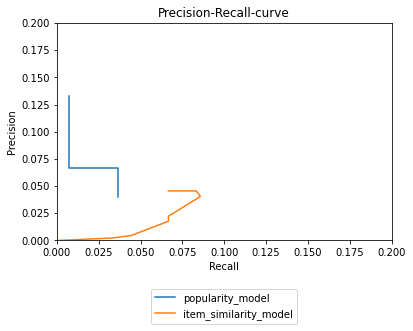

In [20]:
print("Plotting Precision recall curves")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model", ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

plotting precision recall curves for a larger subset of data (100,000 rows) (user sample 0.005)
Plotting precision recall curves


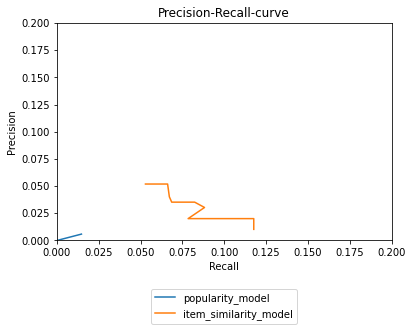

In [21]:
print("plotting precision recall curves for a larger subset of data (100,000 rows) (user sample 0.005)")
pm_avg_precision_list = joblib.load('pm_avg_precision_list_3.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_3.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_3.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_3.pkl')
print("Plotting precision recall curves")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model", ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

plotting precision recall curves for a larger subset of data (100,000 rows) (user sample 0.005)
Plotting precision recall curves


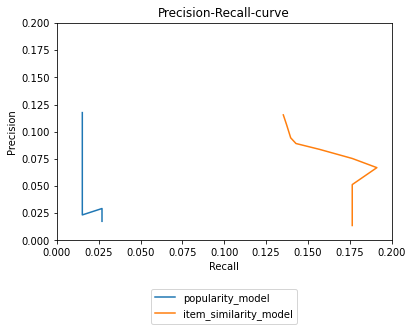

In [22]:
print("plotting precision recall curves for a larger subset of data (100,000 rows) (user sample 0.005)")
pm_avg_precision_list = joblib.load('pm_avg_precision_list_2.pkl')
pm_avg_recall_list = joblib.load('pm_avg_recall_list_2.pkl')
ism_avg_precision_list = joblib.load('ism_avg_precision_list_2.pkl')
ism_avg_recall_list = joblib.load('ism_avg_recall_list_2.pkl')
print("Plotting precision recall curves")
plot_precision_recall(pm_avg_precision_list, pm_avg_recall_list, "popularity_model", ism_avg_precision_list, ism_avg_recall_list, "item_similarity_model")

In [23]:
import math as mt
import csv
from sparsesvd import sparsesvd
import numpy as np
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import *

In [27]:
MAX_PID = 4
MAX_UID = 5
def compute_SVD(urm, K):
    U, s, Vt = sparsesvd(urm, K)
    dim = (len(s), len(s))
    S = np.zeros(dim, dtype=np.float32)
    for i in range(0, len(s)):
        S[i, i] = mt.sqrt(s[i])
    U = csc_matrix(np.transpose(U), dtype=np.float32)
    S = csc_matrix(S, dtype=np.float32)
    Vt = csc_matrix(Vt, dtype=np.float32)
    return U, S, Vt

In [28]:
def compute_estimated_ratings(urm, U, S, Vt, utest, K, test):
    right_term = S*Vt
    estimated_ratings = np.zeros(shape=(MAX_UID, MAX_PID), dtype=np.float16)
    for user_test in utest:
        prod = U[user_test, :]*right_term
        estimated_ratings[user_test, :] = prod.todense()
        recom = (-estimated_ratings[user_test, :]).argsort()[:250]
    return recom

In [29]:
K = 2
urm = np.array([[3, 1, 2, 3],[4, 3, 4, 3],[3, 2, 1, 5], [1, 6, 5, 2], [5, 0, 0, 0]])
urm = csc_matrix(urm, dtype=np.float32)
U, S, Vt = compute_SVD(urm, K)
uTest = [4]
print("user id for whom recommendations are needed: %d" % uTest[0])
print("Predicted ratings:")
uTest_recommend_items = compute_estimated_ratings(urm, U, S, Vt, uTest, K, True)
print(uTest_recommend_items)

user id for whom recommendations are needed: 4
Predicted ratings:
[0 3 2 1]


Matrix dimension for U
(5, 2)


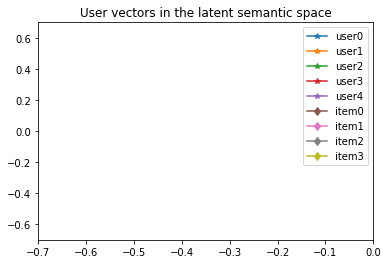

In [30]:
%matplotlib inline
from pylab import *
print("Matrix dimension for U")
print(U.shape)
for i in range(0, U.shape[0]):
    plot(U[i, 0], U[i, 1], marker="*", label="user"+str(i))
for j in range(0, Vt.T.shape[0]):
    plot(Vt.T[j, 0], Vt.T[j, 1], marker='d', label="item"+str(j))
legend(loc="upper right")
title("User vectors in the latent semantic space")
ylim([-0.7, 0.7])
xlim([-0.7, 0])
show()